In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stats AI ML/csv files/rainfall.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['TIME'], format='%Y-%m-%d')

In [ ]:
df['Year'] = df['Date'].dt.year

In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df

,Unnamed: 0,LONGITUDE,LATITUDE,TIME,RAINFALL,Date,Year,Month
0,0,68.00,23.75,2010-01-01,0.000000,2010-01-01,2010,1
1,1,68.00,23.75,2010-01-02,0.000000,2010-01-02,2010,1
2,2,68.00,23.75,2010-01-03,0.436567,2010-01-03,2010,1
3,3,68.00,23.75,2010-01-04,0.000000,2010-01-04,2010,1
4,4,68.00,23.75,2010-01-05,0.000000,2010-01-05,2010,1
...,...,...,...,...,...,...,...,...
47119159,47119159,97.25,28.25,1998-12-27,0.000000,1998-12-27,1998,12
47119160,47119160,97.25,28.25,1998-12-28,0.000000,1998-12-28,1998,12
47119161,47119161,97.25,28.25,1998-12-29,0.000000,1998-12-29,1998,12
47119162,47119162,97.25,28.25,1998-12-30,0.000000,1998-12-30,1998,12


In [ ]:
df = df.drop(columns = ['Unnamed: 0', 'TIME'])

In [ ]:
df

,LONGITUDE,LATITUDE,RAINFALL,Date,Year,Month
0,68.00,23.75,0.000000,2010-01-01,2010,1
1,68.00,23.75,0.000000,2010-01-02,2010,1
2,68.00,23.75,0.436567,2010-01-03,2010,1
3,68.00,23.75,0.000000,2010-01-04,2010,1
4,68.00,23.75,0.000000,2010-01-05,2010,1
...,...,...,...,...,...,...
47119159,97.25,28.25,0.000000,1998-12-27,1998,12
47119160,97.25,28.25,0.000000,1998-12-28,1998,12
47119161,97.25,28.25,0.000000,1998-12-29,1998,12
47119162,97.25,28.25,0.000000,1998-12-30,1998,12


In [ ]:
monsoon_df = df[(df['Month'] >= 6) & (df['Month'] <= 9)]

In [ ]:
monsoon_df

,LONGITUDE,LATITUDE,RAINFALL,Date,Year,Month
151,68.00,23.75,0.000000,2010-06-01,2010,6
152,68.00,23.75,0.000000,2010-06-02,2010,6
153,68.00,23.75,0.000000,2010-06-03,2010,6
154,68.00,23.75,0.000000,2010-06-04,2010,6
155,68.00,23.75,0.000000,2010-06-05,2010,6
...,...,...,...,...,...,...
47119067,97.25,28.25,0.000000,1998-09-26,1998,9
47119068,97.25,28.25,20.600002,1998-09-27,1998,9
47119069,97.25,28.25,0.000000,1998-09-28,1998,9
47119070,97.25,28.25,0.000000,1998-09-29,1998,9


In [ ]:
monsoon_df = monsoon_df.sort_values(by=['Year', 'Month'])

# Reset the index for the sorted DataFrame
monsoon_df = monsoon_df.reset_index(drop=True)

In [ ]:
monsoon_df

,LONGITUDE,LATITUDE,RAINFALL,Date,Year,Month
0,68.00,23.75,3.473554,1997-06-01,1997,6
1,68.00,23.75,1.803211,1997-06-02,1997,6
2,68.00,23.75,20.312241,1997-06-03,1997,6
3,68.00,23.75,0.000000,1997-06-04,1997,6
4,68.00,23.75,0.000000,1997-06-05,1997,6
...,...,...,...,...,...,...
15739459,97.25,28.25,0.000000,2022-09-26,2022,9
15739460,97.25,28.25,0.000000,2022-09-27,2022,9
15739461,97.25,28.25,0.000000,2022-09-28,2022,9
15739462,97.25,28.25,0.000000,2022-09-29,2022,9


In [ ]:
import pandas as pd

In [ ]:
monsoon_df.to_csv('rainfall_subset.csv')

In [ ]:
from scipy.stats import genextreme
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Stats AI ML/csv files/rainfall_subset.csv')

In [ ]:
pip install openturns

In [ ]:
import openturns as ot
import openturns.viewer as viewer
from matplotlib import pylab as plt

ot.Log.Show(ot.Log.NONE)

In [ ]:
# Points above Threshold method
threshold = 90
ex_df = df[df["RAINFALL"] > threshold]

# Convert the rainfall data to an OpenTURNS Sample
rainfall_sample = ot.Sample(ex_df["RAINFALL"].values.reshape(-1, 1))

In [ ]:
myDistribution = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(rainfall_sample)

In [ ]:
myDistribution

class=GeneralizedExtremeValue name=GeneralizedExtremeValue mu=105.79 sigma=16.956 xi=0.610178 actual distribution=class=Frechet name=Frechet dimension=1 beta=27.7886 alpha=1.63887 gamma=78.0017

In [ ]:
print(myDistribution.getActualDistribution())

Frechet(beta = 27.7886, alpha = 1.63887, gamma = 78.0017)


In [ ]:
myFittedDist_entire = ot.GeneralizedParetoFactory().buildAsGeneralizedPareto(rainfall_sample)
print(myFittedDist_entire)

GeneralizedPareto(sigma = 34.1152, xi=0.147987, u=89.9993)


In [ ]:
threshold = 2

# Create a new binary column to indicate rainy (1) and non-rainy (0) days
df["Rainy_Day"] = (df["RAINFALL"] > threshold).astype(int)

In [ ]:
df

,LONGITUDE,LATITUDE,RAINFALL,Date,Year,Month,Rainy_Day
0,68.00,23.75,0.000000,2010-01-01,2010,1,0
1,68.00,23.75,0.000000,2010-01-02,2010,1,0
2,68.00,23.75,0.436567,2010-01-03,2010,1,0
3,68.00,23.75,0.000000,2010-01-04,2010,1,0
4,68.00,23.75,0.000000,2010-01-05,2010,1,0
...,...,...,...,...,...,...,...
47119159,97.25,28.25,0.000000,1998-12-27,1998,12,0
47119160,97.25,28.25,0.000000,1998-12-28,1998,12,0
47119161,97.25,28.25,0.000000,1998-12-29,1998,12,0
47119162,97.25,28.25,0.000000,1998-12-30,1998,12,0


In [ ]:
df_f = df[df["Rainy_Day"] == 1]

In [ ]:
df_f

,LONGITUDE,LATITUDE,RAINFALL,Date,Year,Month,Rainy_Day
156,68.00,23.75,2.505514,2010-06-06,2010,6,1
157,68.00,23.75,37.290337,2010-06-07,2010,6,1
187,68.00,23.75,11.327294,2010-07-07,2010,7,1
188,68.00,23.75,9.240360,2010-07-08,2010,7,1
189,68.00,23.75,2.827500,2010-07-09,2010,7,1
...,...,...,...,...,...,...,...
47119113,97.25,28.25,7.600000,1998-11-11,1998,11,1
47119114,97.25,28.25,11.600001,1998-11-12,1998,11,1
47119125,97.25,28.25,20.000000,1998-11-23,1998,11,1
47119126,97.25,28.25,18.400000,1998-11-24,1998,11,1


In [ ]:
rainfall_data_filtered = df_f["RAINFALL"].values

# Convert the rainfall data to an OpenTURNS Sample
rainfall_sample_updated = ot.Sample(rainfall_data_filtered.reshape(-1, 1))

In [ ]:
myDistribution_updated = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(rainfall_sample_updated)

In [ ]:
myDistribution_updated

class=GeneralizedExtremeValue name=GeneralizedExtremeValue mu=6.08534 sigma=4.97474 xi=0.848011 actual distribution=class=Frechet name=Frechet dimension=1 beta=5.86636 alpha=1.17923 gamma=0.218988

In [ ]:
print(myDistribution_updated.getActualDistribution())

Frechet(beta = 5.86636, alpha = 1.17923, gamma = 0.218988)


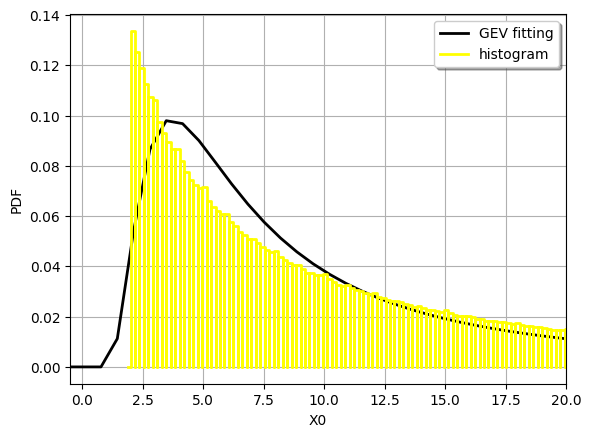

In [ ]:
graph = myDistribution_updated.drawPDF()
graph.add(ot.HistogramFactory().build(rainfall_sample_updated).drawPDF())
graph.setColors(["black", "yellow"])
graph.setLegends(["GEV fitting", "histogram"])
graph.setLegendPosition("topright")

view = viewer.View(graph)
axes = view.getAxes()
_ = axes[0].set_xlim(-0.5, 20)

In [ ]:
myFittedDist = ot.GeneralizedParetoFactory().buildAsGeneralizedPareto(rainfall_sample_updated)
print(myFittedDist)

GeneralizedPareto(sigma = 9.16914, xi=0.346277, u=2)


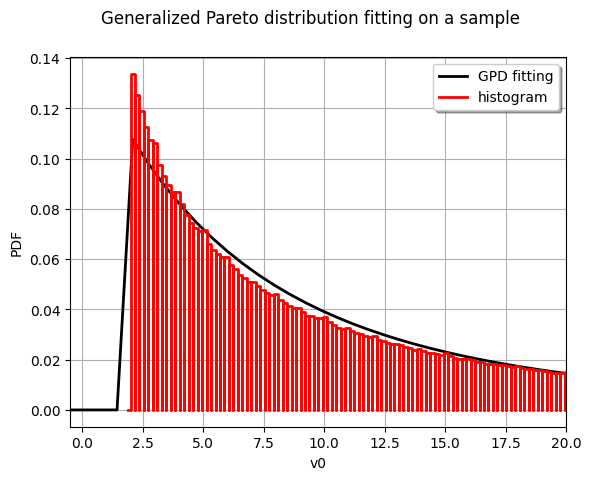

In [ ]:
graph = myFittedDist.drawPDF()
graph.add(ot.HistogramFactory().build(rainfall_sample_updated).drawPDF())
graph.setTitle("Generalized Pareto distribution fitting on a sample")
graph.setColors(["black", "red"])
graph.setLegends(["GPD fitting", "histogram"])
graph.setLegendPosition("topright")

view = viewer.View(graph)
axes = view.getAxes()
_ = axes[0].set_xlim(-0.5, 20.0)


plt.show()

In [ ]:
# Define a threshold
threshold = 90  # Set the threshold based on your data and requirements

# Extract exceedances above the threshold
exceedances = df[df["RAINFALL"] > threshold]

exceedances_updated = ot.Sample(exceedances["RAINFALL"].values.reshape(-1,1))

# Fit a Generalized Pareto Distribution to the exceedances
gpd = ot.GeneralizedParetoFactory().buildAsGeneralizedPareto(exceedances_updated)

# Estimate return levels for different return periods
return_periods = [5,10,15,25,50,75,100]  # Adjust as needed
return_levels = [gpd.computeQuantile(1 - 1 / r) for r in return_periods]

In [ ]:
# Print return levels
i = 0
for rp, rl in zip(return_periods, return_levels):
    print(f"{rp:.2f} year Return Level: {rl[i]:.2f}")

5.00 year Return Level: 152.00
10.00 year Return Level: 183.60
15.00 year Return Level: 203.64
25.00 year Return Level: 230.67
50.00 year Return Level: 270.76
75.00 year Return Level: 296.20
100.00 year Return Level: 315.19


In [ ]:
threshold = 90  # Set the threshold based on your data and requirements

# Extract exceedances above the threshold
exceedances = df[df["RAINFALL"] > threshold]

exceedances_updated = ot.Sample(exceedances["RAINFALL"].values.reshape(-1,1))

# Fit a Generalized Pareto Distribution to the exceedances
gpd = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(exceedances_updated)

# Estimate return levels for different return periods
return_periods = [5,10,15,25,50,75,100]  # Adjust as needed
return_levels = [gpd.computeQuantile(1 - 1 / r) for r in return_periods]

# Print return levels
i = 0
for rp, rl in zip(return_periods, return_levels):
    print(f"{rp:.2f} year Return Level: {rl[i]:.2f}")

5.00 year Return Level: 147.40
10.00 year Return Level: 187.70
15.00 year Return Level: 220.04
25.00 year Return Level: 273.65
50.00 year Return Level: 378.52
75.00 year Return Level: 463.67
100.00 year Return Level: 538.14


In [ ]:
from scipy.stats import genextreme

Shape Parameter (xi): -0.8480129844626865
Location Parameter (mu): 6.085333909252851
Scale Parameter (sigma): 4.974720810054936


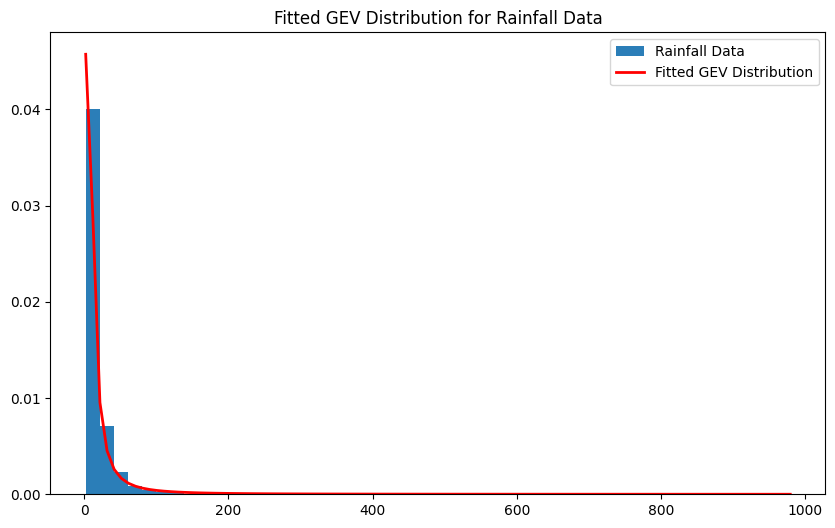

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the rainfall data
rainfall_data = df_f["RAINFALL"].values

# Fit a Generalized Extreme Value (GEV) distribution
params = genextreme.fit(rainfall_data)

# Display the fitted distribution parameters
print("Shape Parameter (xi):", params[0])
print("Location Parameter (mu):", params[1])
print("Scale Parameter (sigma):", params[2])

# Plot the fitted distribution against the data
plt.figure(figsize=(10, 6))
plt.hist(rainfall_data, bins=50, density=True, alpha=0.95, label='Rainfall Data')
x = np.linspace(min(rainfall_data), max(rainfall_data), 100)
pdf = genextreme.pdf(x, *params)
plt.plot(x, pdf, 'r-', lw=2, label='Fitted GEV Distribution')
plt.legend()
plt.title('Fitted GEV Distribution for Rainfall Data')
plt.show()

In [ ]:
max_value = df['RAINFALL'].max()

In [ ]:
max_value

979.144775390625

In [ ]:
# Calculate the threshold (replace with your method to estimate the threshold)
threshold = 90.0

# Create a new DataFrame with excesses data
excesses_df = df_f[df_f['RAINFALL'] > threshold]

# Fit a Generalized Extreme Value (GEV) distribution to the excesses
params = genextreme.fit(excesses_df['RAINFALL'].values)

# Display the fitted distribution parameters
print("Shape Parameter (xi):", params[0])
print("Location Parameter (mu):", params[1])
print("Scale Parameter (sigma):", params[2])

Shape Parameter (xi): -0.6101730599028216
Location Parameter (mu): 105.79032990378244
Scale Parameter (sigma): 16.955969559381497


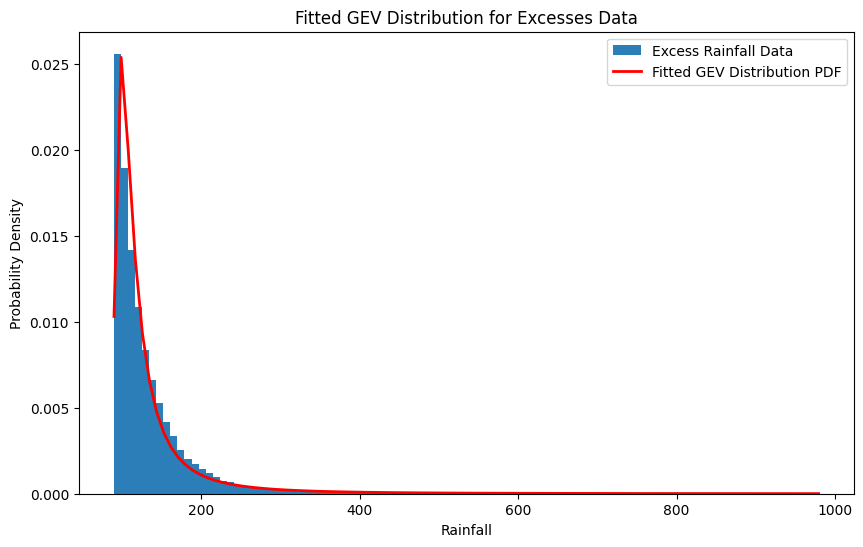

In [ ]:
# Create a range of values for the x-axis
x = np.linspace(excesses_df['RAINFALL'].min(), excesses_df['RAINFALL'].max(), 100)

# Compute the PDF of the fitted GEV distribution
pdf = genextreme.pdf(x, *params)

# Create a histogram of the excesses data
plt.figure(figsize=(10, 6))
#sns.histplot(excesses_df['RAINFALL'], kde=True, label='Excesses Data')
plt.hist(excesses_df['RAINFALL'].values, bins=100, density=True, alpha=0.95, label='Excess Rainfall Data')

# Plot the fitted GEV distribution PDF
plt.plot(x, pdf, 'r-', lw=2, label='Fitted GEV Distribution PDF')

plt.xlabel('Rainfall')
plt.ylabel('Probability Density')
plt.title('Fitted GEV Distribution for Excesses Data')
plt.legend()
plt.show()

In [ ]:
# Fitted parameters from the Pareto distribution
shape = params[0]  # Replace with the shape parameter obtained from the fit
scale = params[2]  # Replace with the scale parameter obtained from the fit

# Define the return periods of interest (in years)
return_periods = [2, 5, 10,25, 50,75, 100]  # Adjust as needed

# Calculate return levels using the Pareto distribution CDF
return_levels = [scale / (1 - 1 / r)**(1 / shape) for r in return_periods]

# Print return levels
for rp, rl in zip(return_periods, return_levels):
    print(f"{rp}-year Return Level: {rl:.2f}")

2-year Return Level: 5.44
5-year Return Level: 11.76
10-year Return Level: 14.27
25-year Return Level: 15.86
50-year Return Level: 16.40
75-year Return Level: 16.59
100-year Return Level: 16.68


In [ ]:
import scipy.stats as stats

In [ ]:
# Calculate the threshold (replace with your method to estimate the threshold)
threshold = 90.0

# Create a new DataFrame with excesses data
excesses_df = df_f[df_f['RAINFALL'] > threshold]

# Fit a Generalized Extreme Value (GEV) distribution to the excesses
params = stats.pareto.fit(excesses_df['RAINFALL'].values)

# Display the fitted distribution parameters
print("Shape Parameter (xi):", params[0])
print("Location Parameter (mu):", params[1])
print("Scale Parameter (sigma):", params[2])

Shape Parameter (xi): 6.721769556808529
Location Parameter (mu): -140.00938904358264
Scale Parameter (sigma): 230.00939667297715


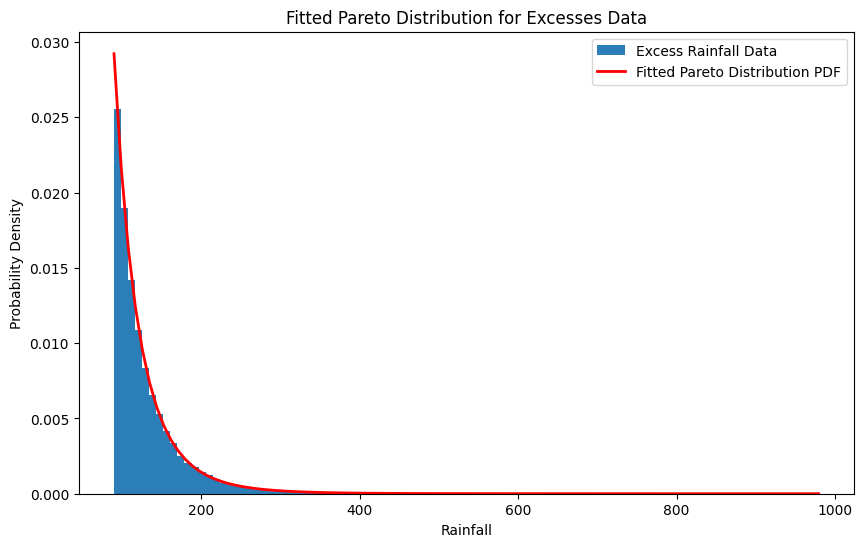

In [ ]:
# Create a range of values for the x-axis
x = np.linspace(excesses_df['RAINFALL'].min(), excesses_df['RAINFALL'].max(), 100)

# Compute the PDF of the fitted GEV distribution
pdf = stats.pareto.pdf(x, *params)

# Create a histogram of the excesses data
plt.figure(figsize=(10, 6))
plt.hist(excesses_df['RAINFALL'].values, bins=100, density=True, alpha=0.95, label='Excess Rainfall Data')

# Plot the fitted GEV distribution PDF
plt.plot(x, pdf, 'r-', lw=2, label='Fitted Pareto Distribution PDF')

plt.xlabel('Rainfall')
plt.ylabel('Probability Density')
plt.title('Fitted Pareto Distribution for Excesses Data')
plt.legend()
plt.show()

In [ ]:
# Fitted parameters from the Pareto distribution
shape = params[0]  # Replace with the shape parameter obtained from the fit
scale = params[2]  # Replace with the scale parameter obtained from the fit

# Define the return periods of interest (in years)
return_periods = [2, 5, 10, 50, 100]  # Adjust as needed

# Calculate return levels using the Pareto distribution CDF
return_levels = [scale / (1 - 1 / r)**(1 / shape) for r in return_periods]

# Print return levels
for rp, rl in zip(return_periods, return_levels):
    print(f"{rp}-year Return Level: {rl:.2f}")

2-year Return Level: 254.99
5-year Return Level: 237.77
10-year Return Level: 233.64
50-year Return Level: 230.70
100-year Return Level: 230.35


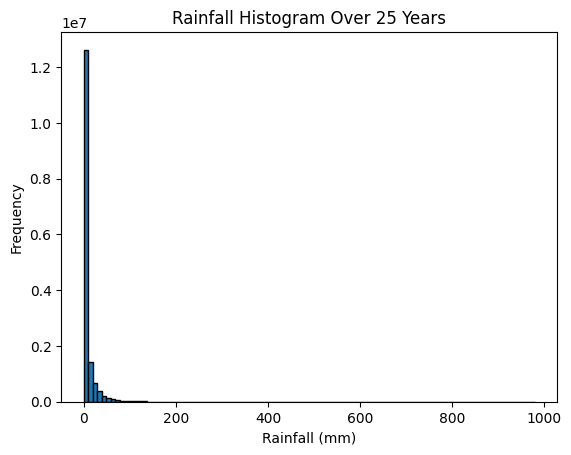

In [ ]:
rainfall_data = df['RAINFALL']

# Create a histogram
plt.hist(rainfall_data, bins=100, edgecolor='black')

# Add labels and a title
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Rainfall Histogram Over 25 Years")

# Display the histogram
plt.show()